<a href="https://colab.research.google.com/github/jhmoon19/class2021Spring/blob/main/5_16_%EC%98%81%EC%9D%8C%EC%9D%91_%EB%B3%B5%EC%8A%B5(%EB%AA%A8%EC%9D%8C%EC%83%9D%EC%84%B1%EA%B9%8C%EC%A7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate pulse train (=source)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

In [ ]:
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  s = amp * np.sin(theta)

  return s, t, theta

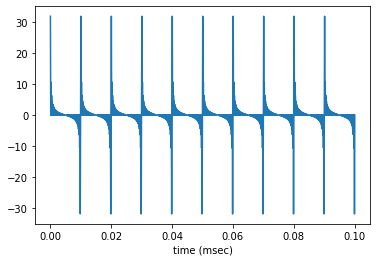

In [ ]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 100
Fend = int(sr/2)

s_all = 0
for freq in range(F0, Fend+1, F0):
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]);
ax.set_xlabel('time (msec)')
ipd.Audio(s_all, rate=sr)

# Filter Source

In [ ]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b
    
# 이 부분 원리 안배움!!

In [ ]:
s = s_all
# source를 쓰기 쉽게 다시 s로 바꿈 

## 1) 사람의 srouce처럼 점점 amp감소하도록 pulse train 바꿔주기

In [ ]:
RG = 0      # 산맥에 해당하는 frequency(위치) # 산맥을 0Hz에 넣음 
BWG = 100   # 그것의 band width # 왜 100일까? BW는 F1(90),F2,F3...점점 증가하는데, 
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis = 0)  # 왜 b,a로 넣음? 
ipd.Audio(s, rate = sr)

## 이제부터 F1,F2,F3,F4,F5 차례대로(위치RG, 폭BWG를 통해) 틀을 찍어낸다!
## 점점 소리가 실제 모음에 가까워짐! (a 모음)

In [ ]:
RG = 750
BWG = 90
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis = 0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 1187  # RG is the frequency of the 2nd Formant
BWG = 110  # BWG is the bandwidth of the 2nd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2595  # RG is the frequency of the 3rd Formant
BWG = 170  # BWG is the bandwidth of the 3rd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3781  # RG is the frequency of the 4th Formant
BWG = 250  # BWG is the bandwidth of the 4th Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)